# Week 4 Individual Coding Assignment: Neighborhood Case Studies 
Hi there, Audrey here. In this notebook, I identify notably dense or transit-oriented neighborhoods in Los Angeles County and Seoul Metropolitan Area, for comparison using OSMnx. 

## Population Density 

### Los Angeles County
First, I calculate the population density for LA County Census tracts to identify neighborhoods. 
Building from my submission for Week 3 Group Assignment 2, I identify Census tracts in Los Angeles with the highest population densities. I clean and plot the data to identify the Census tracts with the highest population density.  

In [1]:
# for spatial data
import geopandas as gpd
# for general data wrangling tasks
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
# for basemaps
import contextily as ctx

# for network analysis
import networkx as nx
# for street network analysis
import osmnx as ox

As a note to myself, the third party libraries for python listed in W101-JupyterandPython are:
* pandas, for data analysis
* geopandas, for geospatial data analaysis
* sodapy, for grabbing open data from socrata clients <font color='purple'>*not sure what this is yet </font> 
* folium, for interactive maps based on leaflet 
* osmnx, for grabbing open street map data for network analysis
* keplergl, for 3D mapping data analytics <font color='purple'>*also don't know yet</font>

###### Exploring population data

Deriving the population stats for LA County:

In [2]:
LA_pop = gpd.read_file('AYJ-GroupData/acs2019_5yr_B01003_14000US06037534001.geojson')

# https://medium.com/nam-r/10-essential-operations-for-spatial-data-in-python-4603d933bdda
##define the current crs 
LA_pop.crs = {'init':'epsg:4326'}
## project to a new crs
LA_pop = LA_pop.to_crs({'init':'epsg:2154'})

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [3]:
list(LA_pop)

['geoid', 'name', 'B01003001', 'B01003001, Error', 'geometry']

In [4]:
LA_pop.head()

,geoid,name,B01003001,"B01003001, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,"MULTIPOLYGON (((-6719111.493 12398849.563, -67..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,"MULTIPOLYGON (((-6717416.202 12399007.173, -67..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,"MULTIPOLYGON (((-6719409.935 12398572.065, -67..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,"MULTIPOLYGON (((-6719784.942 12397286.556, -67..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,394.0,"MULTIPOLYGON (((-6719940.205 12396556.624, -67..."


In [5]:
LA_pop.columns = ['geoid', 'Census Tract', 'Population', 'Error', 'geometry']

In [6]:
LA_pop['Population'].describe()

count     2346.000000
mean      4297.344416
std       1587.065962
min          0.000000
25%       3203.750000
50%       4211.500000
75%       5314.000000
max      12463.000000
Name: Population, dtype: float64

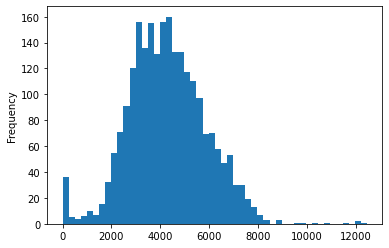

In [7]:
LA_pop['Population'].plot.hist(bins=50)

Find the area of each Census tract and add it to a new column: 

In [8]:
LA_pop["area"]=LA_pop['geometry'].area #sq m; divide by 10**6 for sq km

In [9]:
LA_pop.columns = ['GEOID', 'Census Tract Name', 'Population', 'Error', 'geometry', 'area']

In [10]:
list(LA_pop) 

['GEOID', 'Census Tract Name', 'Population', 'Error', 'geometry', 'area']

###### Calculating Population Density

In [11]:
LA_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GEOID              2346 non-null   object  
 1   Census Tract Name  2346 non-null   object  
 2   Population         2346 non-null   float64 
 3   Error              2346 non-null   float64 
 4   geometry           2346 non-null   geometry
 5   area               2346 non-null   float64 
dtypes: float64(3), geometry(1), object(2)
memory usage: 110.1+ KB


Converting 'Population' column to int in order to calculate the population density:

In [12]:
# https://www.geeksforgeeks.org/how-to-convert-strings-to-floats-in-pandas-dataframe/
LA_pop['Population'] = LA_pop['Population'].astype(float)

In [13]:
LA_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GEOID              2346 non-null   object  
 1   Census Tract Name  2346 non-null   object  
 2   Population         2346 non-null   float64 
 3   Error              2346 non-null   float64 
 4   geometry           2346 non-null   geometry
 5   area               2346 non-null   float64 
dtypes: float64(3), geometry(1), object(2)
memory usage: 110.1+ KB


Normalize the Population data; need to find area of each feature in LA_pop geodatframe
Source: https://gis.stackexchange.com/questions/218450/getting-polygon-areas-using-geopandas 

In [14]:
LA_pop["Pop Density"]= LA_pop['Population']/LA_pop['area']

In [15]:
LA_pop.head(3)

,GEOID,Census Tract Name,Population,Error,geometry,area,Pop Density
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,"MULTIPOLYGON (((-6719111.493 12398849.563, -67...",1.190263e+06,0.003598
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,"MULTIPOLYGON (((-6717416.202 12399007.173, -67...",2.754670e+06,0.001236
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,"MULTIPOLYGON (((-6719409.935 12398572.065, -67...",6.779819e+05,0.009362


In [16]:
LA_pop['Pop Density'].describe()

count    2346.000000
mean        0.004918
std         0.004186
min         0.000000
25%         0.002287
50%         0.003882
75%         0.006500
max         0.035073
Name: Pop Density, dtype: float64

I'm going to save the GEOID, Census tract area, and population density columns to a .csv file. 
Source: https://www.kaggle.com/questions-and-answers/71931 

In [17]:
areas_columns = ['GEOID', 'area', 'Pop Density']

In [18]:
areas = LA_pop[areas_columns]

In [26]:
areas.to_csv('AYJ-GroupData/cleanedLApop_areas.csv')

##### Mapping Population Density 
Using plot function

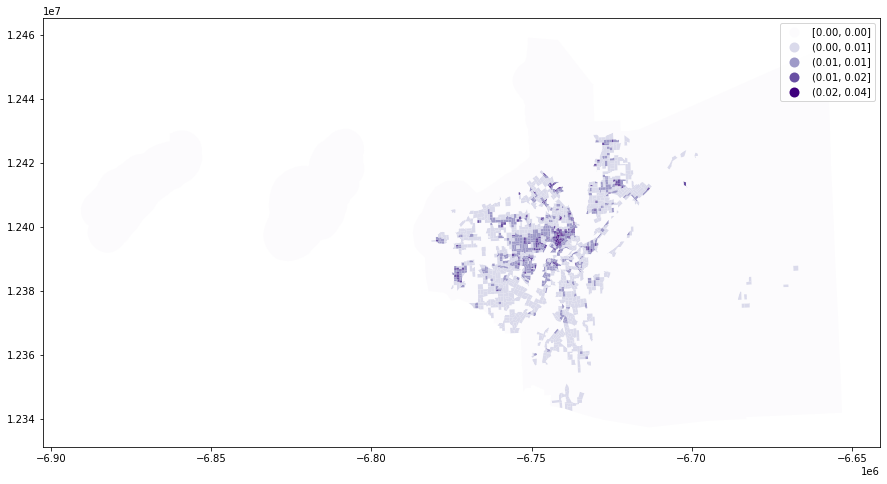

In [20]:
ax = LA_pop.plot(figsize=(15,15),
                 cmap='Purples',
                 column='Pop Density',
                 legend=True,  
                 scheme='NaturalBreaks') #or 'quantiles'? 
## ...why is this map sideways? :/ 

##### Identify Neighborhoods

Now I will map the densest Census Tracts in LA County, using the Jenks Natural Breaks generated by the map above. 
First, defining a geodataframe of the mostly densely populated Census Tracts in LA County:

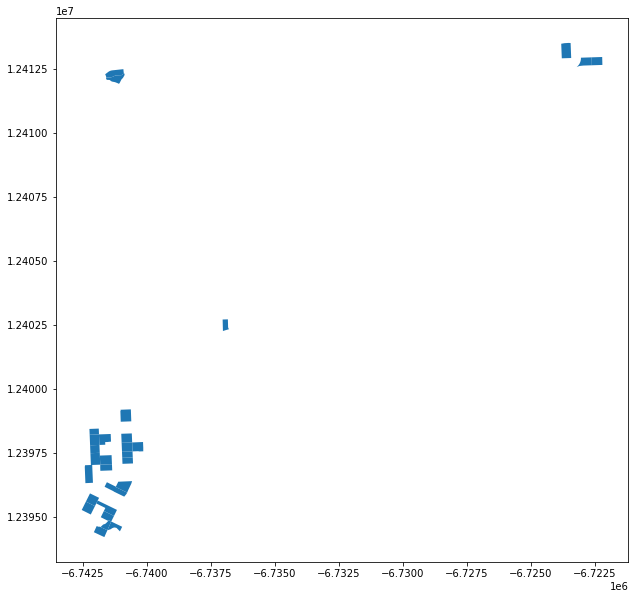

In [21]:
LA_pop[LA_pop['Pop Density'] > 0.02].plot(figsize=(12,10))

In [22]:
denselypop = LA_pop[LA_pop['Pop Density'] > 0.02]

In [23]:
denselypop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 29 entries, 133 to 849
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GEOID              29 non-null     object  
 1   Census Tract Name  29 non-null     object  
 2   Population         29 non-null     float64 
 3   Error              29 non-null     float64 
 4   geometry           29 non-null     geometry
 5   area               29 non-null     float64 
 6   Pop Density        29 non-null     float64 
dtypes: float64(4), geometry(1), object(2)
memory usage: 1.8+ KB


Plotting the most densely populated Census Tracts, again by population density

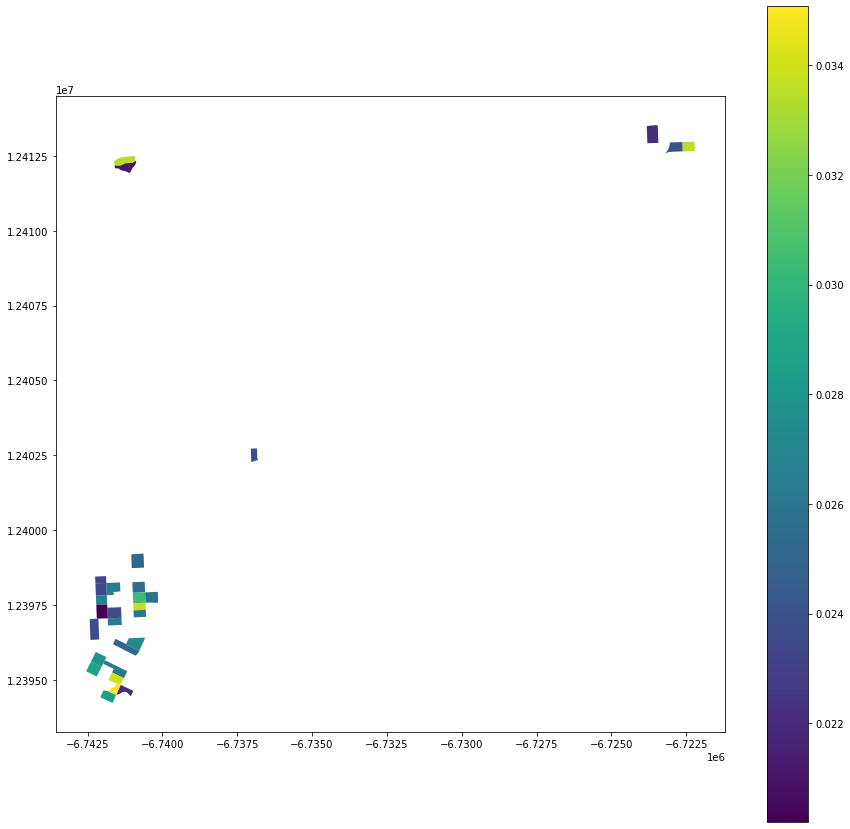

In [24]:
denselypop.plot(
    figsize = (15,15),
    column = 'Pop Density',
    legend = True,  

)

This gives me the LAT and LONG values for the bounding context of the County. 
Source: https://dlab.berkeley.edu/blog/adding-basemaps-python-contextily 

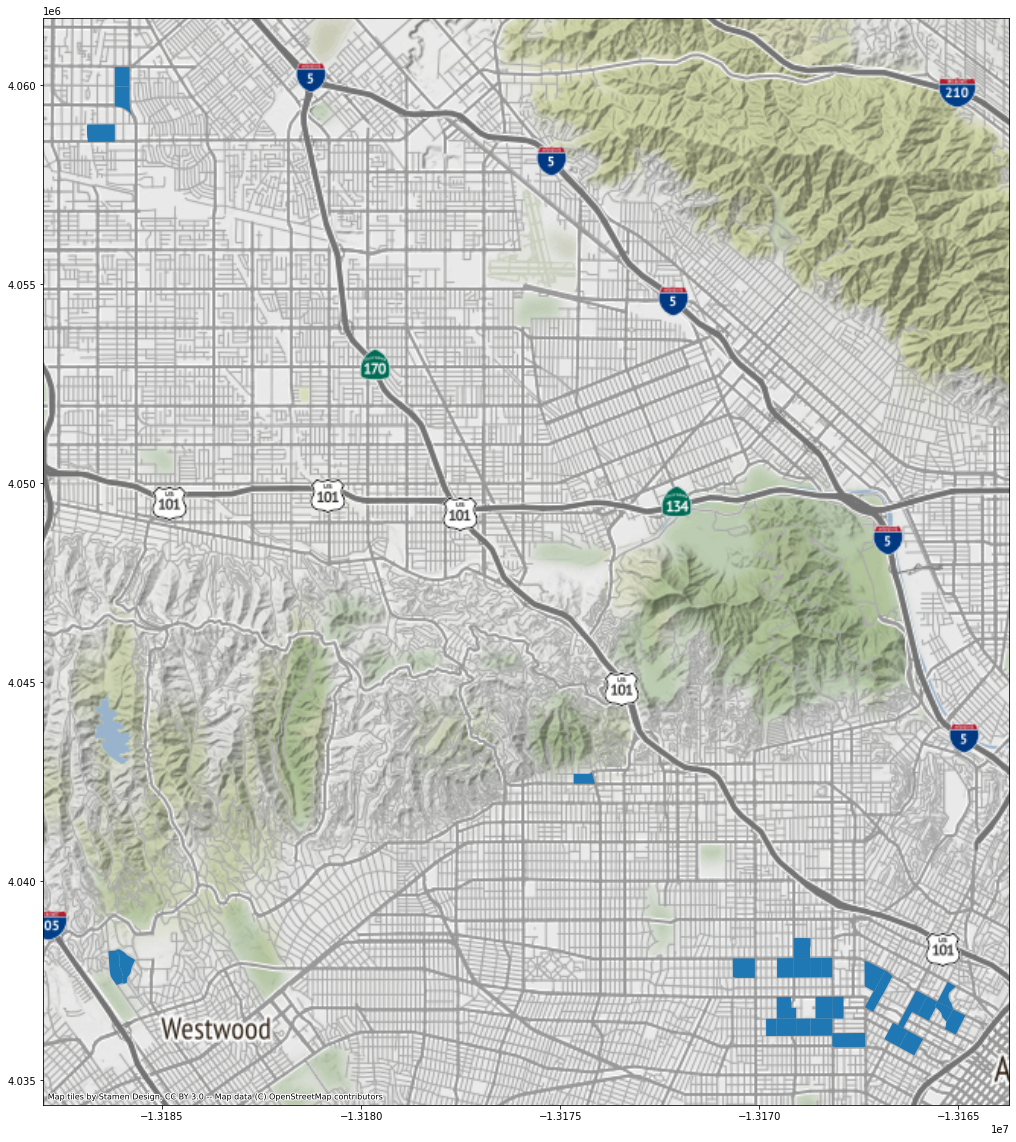

In [25]:
ax = denselypop.to_crs('EPSG:3857').plot(figsize=(20, 20)) #use matplotlib to define plot canvas as ax 
                         #^ the to_crs dynamically transforms coordinate reference system of this geodataframe from geographic lat/long coordinates to web mercator

ctx.add_basemap(ax) #adds a basemap

Looks like MacArthur Park, Koreatown, Panorama City, and Westwood have Census Tracts with the highest population densities. 